In [2]:
import os
import re
import random
import time

import h5py
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import TwoSlopeNorm
from scipy.io import loadmat
from scipy.spatial.distance import pdist, squareform

# method to compute the ratio of correlations given roi index

* often I need to know the ratio of correlation for a specfic roi.
* these are particulary useful for overlay plots 
* current implementation does not allow for this flexibility so I need to run the pipeline all 
* Also, to verify the roi's with high roc and low, it is useful to have this flexibility so that this is easily achieved.
* need to think about how to implement this. 
* curr, I compute dS between all the arrays, or a subset of them, then return the nn for a given roi, 

In [3]:
path0 = '/Users/duuta/ppp/data/zebf00/TimeSeries.h5' 
path1 = '/Users/duuta/ppp/data/zebf00/data_full.mat' 
dholder = h5py.File(path0, "r")
d0 = dholder["CellResp"][:]  # responses
d1 = loadmat(path1, simplify_cells=True)

In [4]:
dholder.keys()

<KeysViewHDF5 ['CellResp', 'CellRespAvr', 'CellRespAvrZ', 'CellRespZ', 'absIX']>

In [5]:
d1['data']['CellXYZ'].shape

(83890, 3)

In [43]:
d1['data'].keys()

dict_keys(['periods', 'timelists_names', 'stimuluskey_raw', 'CellXYZ', 'anat_stack', 'fpsec', 'Behavior_raw', 'numcell_full', 'CellXYZ_norm', 'IX_inval_anat', 'anat_yx', 'anat_yz', 'anat_zx', 'timelists', 'stim_full', 'stimAvr', 'Behavior_full', 'BehaviorAvr', 'Behavior_full_motorseed', 'BehaviorAvr_motorseed', 'Eye_full_motorseed', 'EyeAvr_motorseed', 'Eye_full', 'Eye_avr'])

In [15]:
d1['data']['stimuluskey_raw']

array([2, 2, 2, ..., 3, 3, 3], dtype=uint8)

In [16]:
d1['data']['stimuluskey_raw'].shape

(3500,)

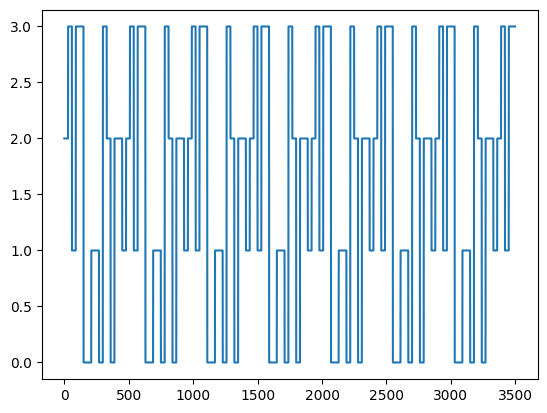

In [17]:
plt.plot(d1['data']['stimuluskey_raw'])

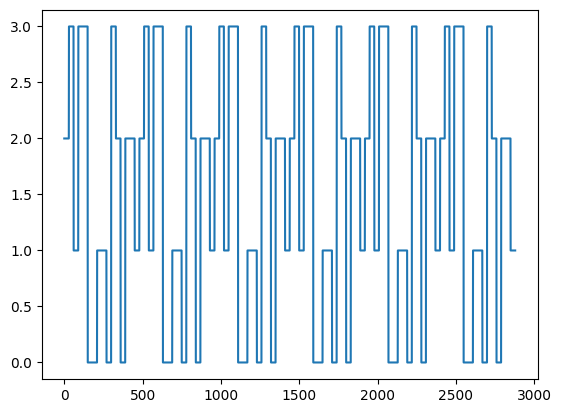

In [20]:
plt.plot(d1['data']['stim_full'])

In [22]:
['data']['Behavior_full'].shape

(5, 2880)

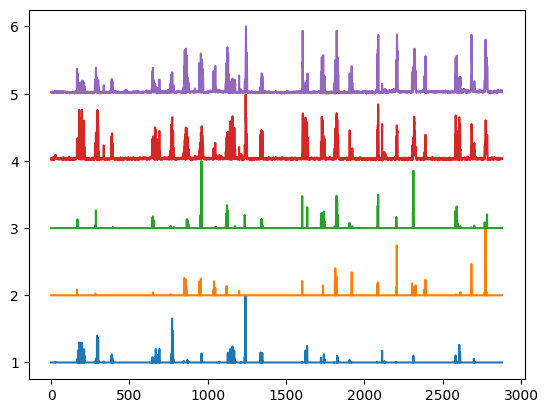

In [31]:
for i in range(5):
    plt.plot(d1['data']['Behavior_full'][i, ] + 1 +i  )

In [ ]:
* 6 dpf - 1 week old,  

In [48]:
d1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'data'])

In [50]:
d1['__v__']

'1.0'

In [42]:
d1['data']['timelists']

array([   1,    2,    3, ..., 2878, 2879, 2880], dtype=uint16)

In [33]:
d0.shape

(2880, 83205)

In [34]:
83205 * 2880

239630400

In [36]:
d0.argmax(axis=1)

array([45798, 45798, 45798, ..., 62432, 45798, 45798])

In [22]:
83890 * 2880

241603200

In [28]:
dummy = np.random.randn(2, 2)

In [30]:
dummy.argmax()

1

In [31]:
dummy.shape 

(2, 2)

In [ ]:
def compute_nncorr_roi(roi_index, nn,  metric='euclidean'):
    ds = squareform(pdist(np.array([x, y]).T, metric=metric))
    

    return roc_for_roi 

In [ ]:
def draw_plot(x, 
              y, 
              d0, 
              dS, 
              config_options, 
              postion_top_left,
              position_bottom_left,
              top_rois_list, 
              bottom_rois_list, 
              top_left_labels, 
              bottom_left_labels,
              canvas,
):
    plot = init_plot(canvas, config_options)
    
    inset_axes_top_left=plt.gca().inset_axes(position_top_left, facecolor='white')

    annotations_top_left = [
        {'label':f'ROI:{tar0_idx_high}', 'color': 'white', 'xy': (1050, 950), 'xytext':(tar0_high_x, tar0_high_y), 
         'arrowprops': dict(arrowstyle="fancy",
                                        facecolor='blue',patchB=inset_axes_top_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),},
        {'label':f'ROI:{tar0_nn_idx_high[0]}', 'color': 'white', 'xy': (1050, 950), 'xytext':(tar0_high_nn0_x, tar0_high_nn0_y), 
         'arrowprops': dict(arrowstyle="fancy",
                                        facecolor='orange',patchB=inset_axes_top_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),}, 
        {'label':f'ROI:{tar0_nn_idx_high[1]}', 'color': 'white', 'xy': (1050, 950), 'xytext':(tar0_high_nn1_x, tar0_high_nn1_y), 
         'arrowprops': dict(arrowstyle="fancy",
                                       facecolor='green',patchB=inset_axes_top_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),},
        {'label':f'ROI:{random_neighbors_for_idx0[0]}', 'color': 'white', 'xy': (1050, 950), 'xytext':(rand_idx00_x, rand_idx00_y), 
         'arrowprops': dict(arrowstyle="fancy",
                                        facecolor='red',patchB=inset_axes_top_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),}, 
        {'label':f'ROI:{random_neighbors_for_idx0[1]}', 'color': 'white', 'xy': (1050, 950), 'xytext':(rand_idx01_x, rand_idx01_y), 
         'arrowprops': dict(arrowstyle="fancy",
                                       facecolor='magenta',patchB=inset_axes_top_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),},
    ]
      
    labels_top_left = [
                   f'Target Neuron {tar0_idx_high} : roc={round(roc[tar0_idx_high], 3)}', 
                   f'NN0:{tar0_nn_idx_high[0]} : cor={round(tar0_nn_corr_high[0], 3)}', 
                   f'NN1:{tar0_nn_idx_high[1]} : cor={round(tar0_nn_corr_high[1], 3)}',
                   f'RN0:{random_neighbors_for_idx0[0]} : cor={round(corr00_idx0, 3)}',
                   f'RN1:{random_neighbors_for_idx0[1]} : cor={round(corr01_idx0, 3)}',
    ]

    add_inset_plot_seg(
      inset_axes_top_left,
      roc, 
      annotations_top_left,
      labels=labels_top_left,
      target_rois_list = high_target_rois_list,
    )
    inset_axes_bottom_left = plt.gca().inset_axes((0.01, 0.2, 0.5, 0.1), facecolor='white')

    annotations_bottom_left = [
        {'label':f'ROI:{tar0_idx}', 'color': 'white', 'xy': (1050, 350), 'xytext':(tar0_x, tar0_y), 'arrowprops': dict(arrowstyle="fancy",
                                        facecolor='blue',patchB=inset_axes_bottom_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),},
        {'label':f'ROI:{tar00_idx}', 'color': 'white', 'xy': (1050, 350), 'xytext':(tar00_x, tar00_y), 'arrowprops': dict(arrowstyle="fancy",
                                        facecolor='orange',patchB=inset_axes_bottom_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),}, 
        {'label':f'ROI:{tar01_idx}', 'color': 'white', 'xy': (1050, 350), 'xytext':(tar01_x, tar01_y), 'arrowprops': dict(arrowstyle="fancy",
                                           facecolor='green',patchB=inset_axes_bottom_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),},
        {'label':f'ROI:{random_neighbors_for_idx1[0]}', 'color': 'white', 'xy': (1050, 350), 'xytext':(rand_idx10_x, rand_idx10_y), 'arrowprops': dict(arrowstyle="fancy",
                                        facecolor='red',patchB=inset_axes_bottom_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),}, 
        {'label':f'ROI:{random_neighbors_for_idx1[1]}', 'color': 'white', 'xy': (1050, 350), 'xytext':(rand_idx11_x, rand_idx11_y), 'arrowprops': dict(arrowstyle="fancy",
                                       facecolor='magenta',patchB=inset_axes_bottom_left, shrinkB=5,connectionstyle="arc3,rad=0.3"),},

    ]      

    labels_bottom_left = [f'Target Neuron {tar0_idx_high} : roc={round(roc[tar0_idx_high], 3)}', 
                      f'NN0:{tar0_nn_idx_high[0]} : cor={round(tar0_nn_corr_high[0], 3)}', 
                      f'NN1:{tar0_nn_idx_high[1]} : cor={round(tar0_nn_corr_high[1], 3)}',
                      f'RN0{random_neighbors_for_idx1[0]} : cor={round(corr00_idx1, 3)}',
                      f'RN1:{random_neighbors_for_idx1[1]} : cor={round(corr01_idx1, 3)}',
                   ]

    add_inset_plot_seg(
        inset_axes_bottom_left,
        roc,
        annotations_bottom_left,
        labels=labels_bottom_left,
        target_rois_list = target_rois_list, 
 
    )

    configure_plot(plt, plot, config_options)

 

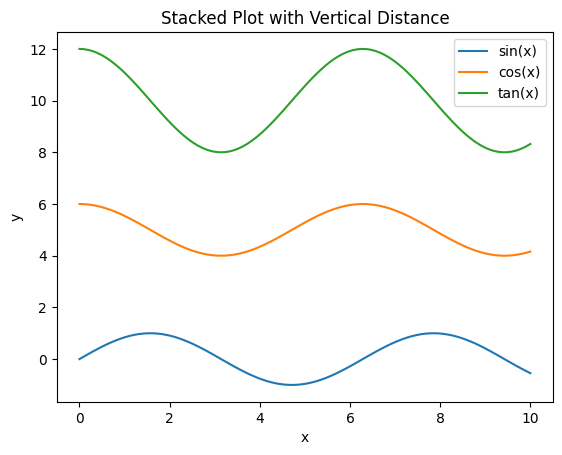

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = y2 + y2

# Define vertical distances between plots
vertical_distances = [0, 5, 10]  # Adjust the distances as needed

# Create stacked plots
plt.plot(x, y1 + vertical_distances[0], label='sin(x)')
plt.plot(x, y2 + vertical_distances[1], label='cos(x)')
plt.plot(x, y3 + vertical_distances[2], label='tan(x)')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stacked Plot with Vertical Distance')
plt.legend()

# Show plot
plt.show()
